In [1]:
import csoundengine as ce

In [2]:
s = ce.Session(latency=0.005)




--Csound version 6.19 (double samples) Jan 19 2025
[commit: 2536da284dd70ec7272040cb0763f70ae57123c4]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


In [3]:
s.defInstr('foo', r'''
|kmidi=60, kamp=0.1|
outch 1, vco2:a(kamp, mtof:k(kmidi))
''')

Instr(foo, kmidi=60, kamp=0.1)

Testing how tight the scheduling is

In [4]:
sy = s.sched('foo')
sy

Abstime: 4.198333333333333, curr. time: 4.3


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ foo=501.0002 start=4.198 dur=-1.000 p5=60 kmidi=0.1)

In [5]:
sy.automate('kmidi', (0, 60, 2, 72, 4, 60))

12

automating p1: 501.000200, index: 5, iovertake: 0, lenpairs: 6, dur: 4.001333


In [6]:
# Worst case, no sync at all

for j in range(10):
    for i in range(100):
        sy = s.sched('foo', dur=0.01, kmidi=36+i*0.1, delay=j*0.5+0.01, kamp=0.01)
        

In [13]:
# The engine's clock is locked during the context manager

s.engine.extraLatency = 0.0
J = 10
N = 80
delayfact = .5
    
with s: 
    for j in range(J):
        for i in range(N): 
            sy = s.sched('foo', dur=0.005, kmidi=24+i*0.25, delay=j*delayfact+0.05, kamp=0.6/N)
        


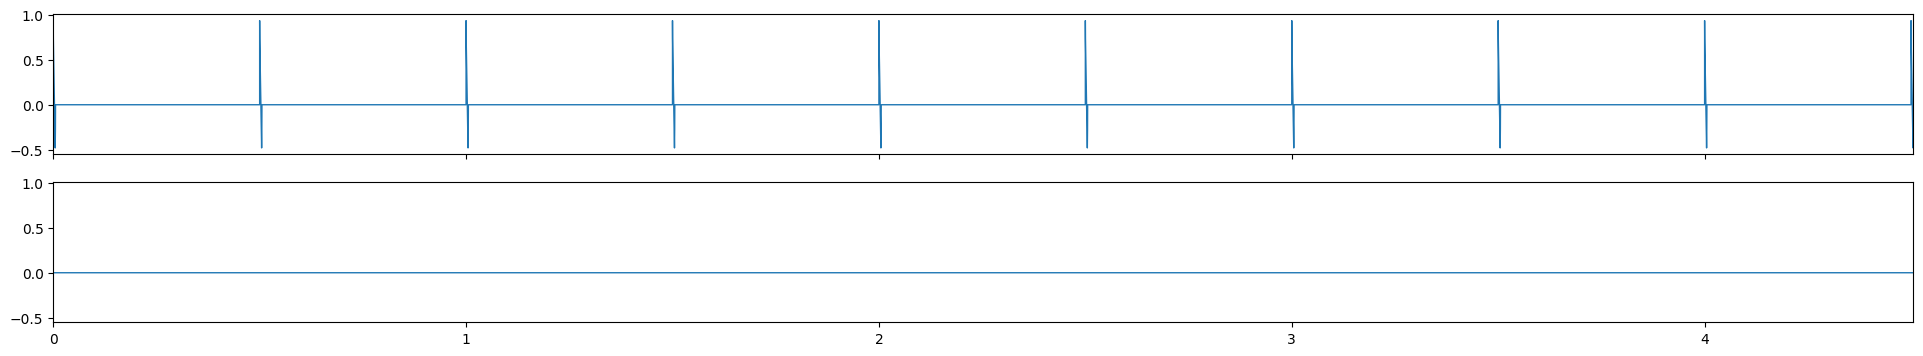

In [8]:
# Ground truth: offline rendering

with s.rendering(verbose=False) as r:
    for j in range(J):
        for i in range(N):
            sy = s.sched('foo', dur=0.005, kmidi=48+i*0.1, delay=j*delayfact, kamp=0.01)
r
# r.writeCsd("~/tmp/impulses.csd")

In [14]:
s.defInstr('ifoo', r'''
|imidi=60, iamp=0.1|
outch 1, oscili:a(iamp, mtof(imidi))
''')

Instr(ifoo, imidi=60, iamp=0.1)

In [15]:
s.engine.extraLatency = 0.
with s.engine.lockedClock():
    for j in range(10):
        for i in range(80):
            sy = s.sched('ifoo', dur=0.01, imidi=36+i*0.1, delay=j*0.5, iamp=0.01)
        


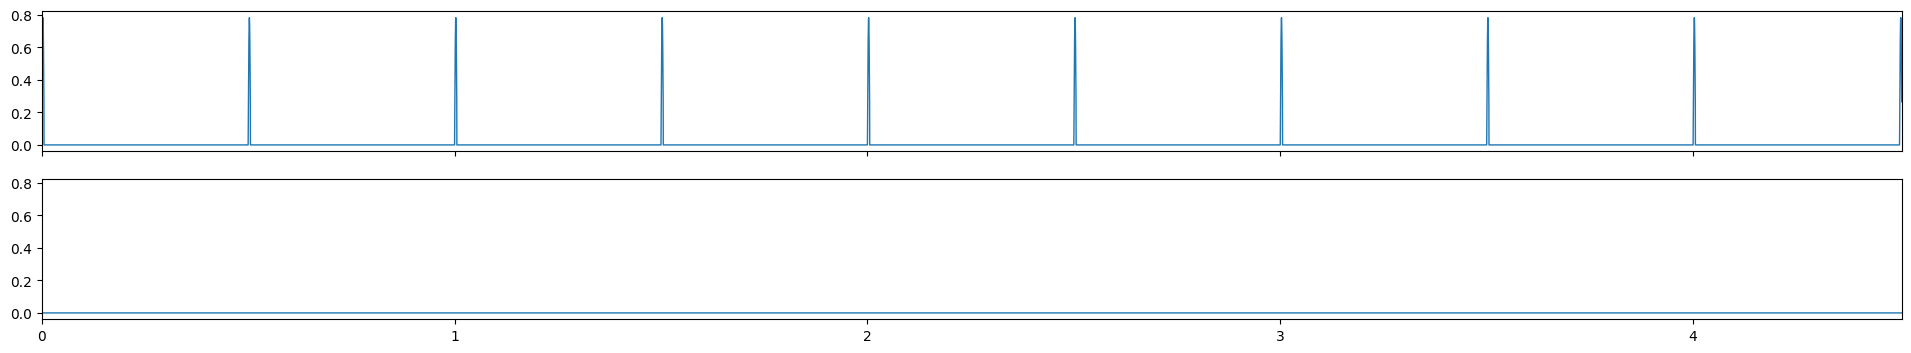

In [16]:
with s.rendering(endtime=8, verbose=False) as r:
    for j in range(10):
        for i in range(80):
            sy = s.sched('ifoo', dur=0.005, imidi=36+i*0.1, delay=j*0.5, iamp=0.01)
r
# r.writeCsd("~/tmp/impulses.csd")